# Lensed waveforms

In [1]:
import numpy as np
from modwaveforms import geomoptics
from modwaveforms import waveoptics
from modwaveforms.utils import point_mass as pm
import bilby

#PLOTTING MODULES
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=15)

## Unlensed general relativity waveform

In [2]:
binary_parameters = dict(
        mass_1=35.,
        mass_2=30.,
        a_1= 0.,
        a_2= 0.,
        tilt_1= 0.,
        tilt_2= 0.,
        phi_12= 0.,
        phi_jl= 0.,
        luminosity_distance = 500.,
        theta_jn = np.pi/3.,
        psi = np.pi/8.,
        phase = 0.,
        geocent_time = 0.,
        ra = np.pi/4.,
        dec = 3.*np.pi/2,
    )

In [3]:
duration = 4.0
sampling_frequency = 2048.0
fs = bilby.core.utils.series.create_frequency_series(sampling_frequency,duration)
ts = bilby.core.utils.series.create_time_series(sampling_frequency,duration)

In [4]:
waveform_arguments = dict(
        waveform_approximant = 'IMRPhenomXPHM',
        reference_frequency = 50.,
        minimum_frequency = 20.,
        maximum_frequency = 2000.,
    )

In [5]:
waveform_generator = bilby.gw.WaveformGenerator(
        duration = duration,
        sampling_frequency = sampling_frequency,
        frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
        parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments = waveform_arguments,
    )

09:56 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


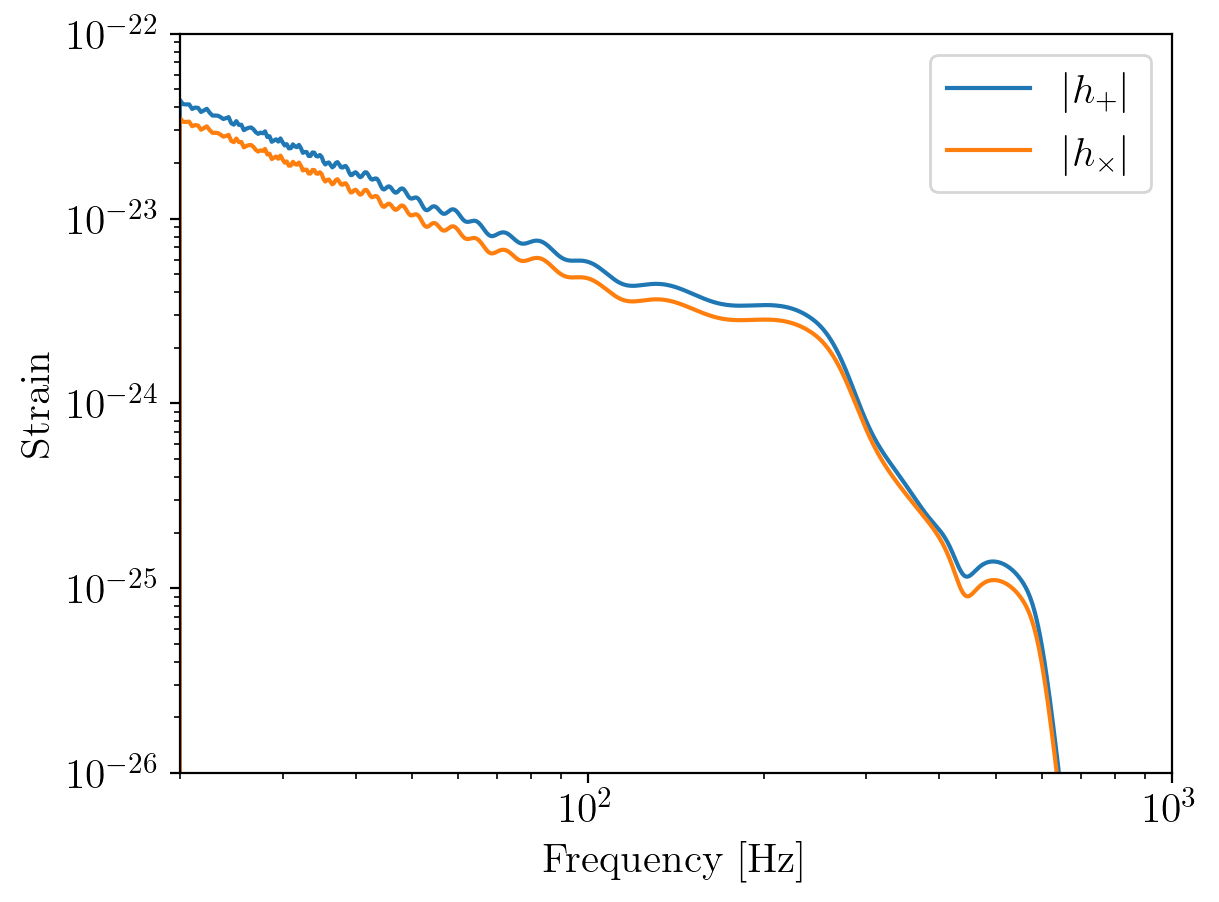

In [6]:
h_gr = waveform_generator.frequency_domain_strain(binary_parameters)
h_t_gr = waveform_generator.time_domain_strain(binary_parameters)

hp_gr = h_gr['plus']
hx_gr = h_gr['cross']


#Plot amplitude of the waveform
plt.loglog(fs,abs(hp_gr),label=r'$|h_+|$')
plt.plot(fs,abs(hx_gr),label=r'$|h_\times|$')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Strain')
plt.xlim([20,1e3])
plt.ylim([1e-26,1e-22])
plt.legend()
plt.show()


## type II images

In [7]:
#Append DeltaPhi to the binary_parameters
binary_parameters_typeII = binary_parameters.copy()
binary_parameters_typeII['Delta_phase'] = np.pi/2.

In [8]:
waveform_generator_typeII = bilby.gw.WaveformGenerator(
        duration = duration,
        sampling_frequency = sampling_frequency,
        frequency_domain_source_model = geomoptics.one_image_BBH,
        parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments = waveform_arguments,
    )

09:56 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: modwaveforms.geomoptics.one_image_BBH
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


For a type II image, only there is only a constant phase shift in frequency domain. However, for signals with higher modes, there can be distortions in the waveform. See https://arxiv.org/abs/2008.12814 for details

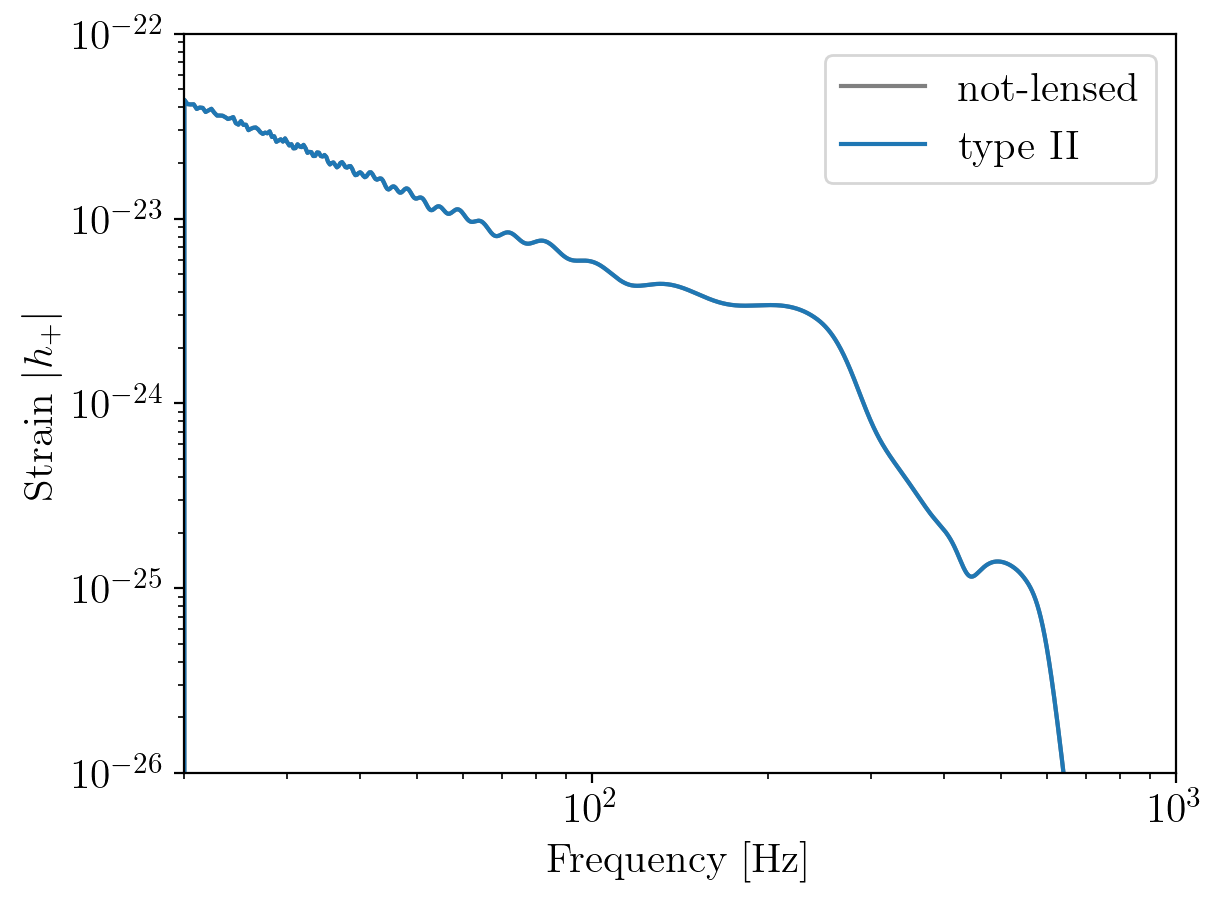

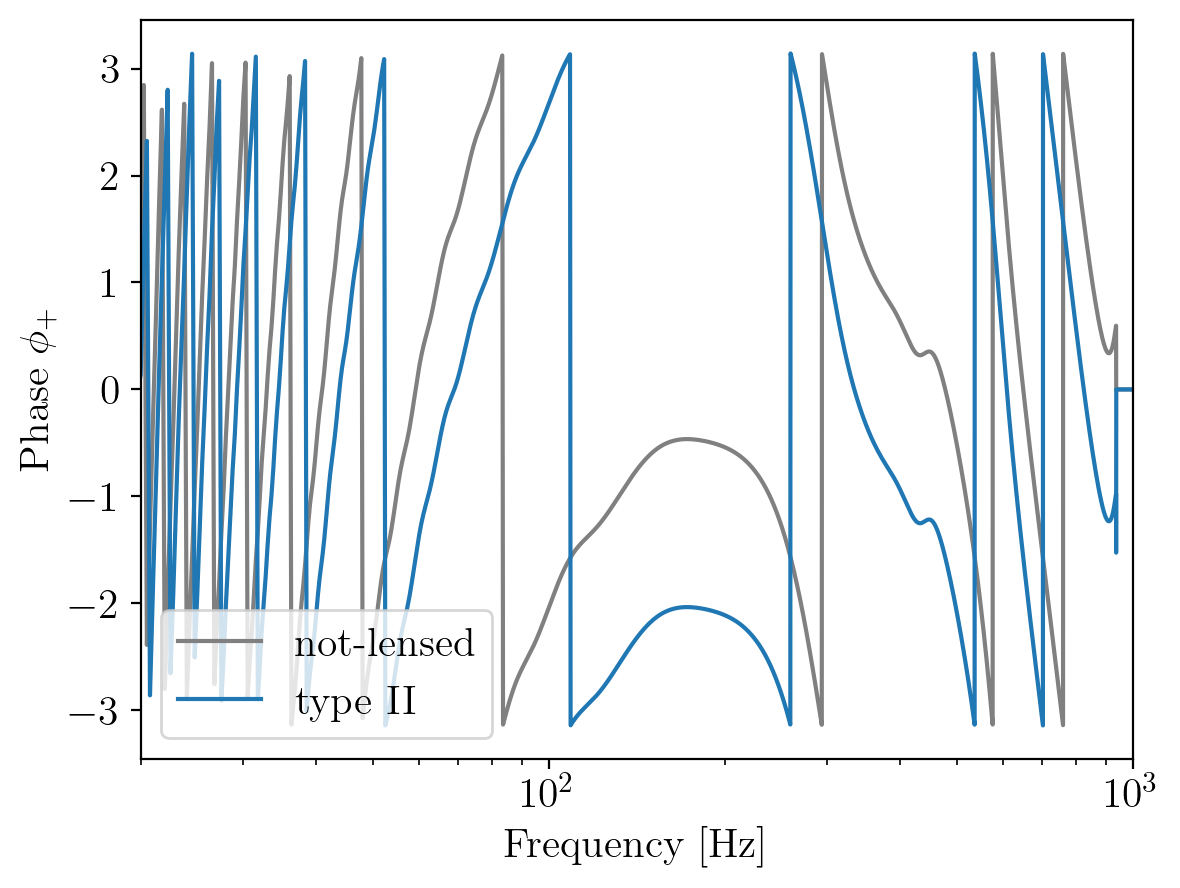

In [9]:
h_typeII = waveform_generator_typeII.frequency_domain_strain(binary_parameters_typeII)

hp_typeII = h_typeII['plus']
hx_typeII = h_typeII['cross']

plt.plot(fs,abs(hp_gr),'gray',label=r'not-lensed')
plt.loglog(fs,abs(hp_typeII),label=r'type II')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Strain $|h_+|$')
plt.xlim([20,1e3])
plt.ylim([1e-26,1e-22])
plt.legend()
plt.show()

#Plot phase of the waveform
plt.semilogx(fs,np.angle(hp_gr),'gray',label=r'not-lensed')
plt.semilogx(fs,np.angle(hp_typeII),label=r'type II')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Phase $\phi_+$')
plt.xlim([20,1e3])
plt.legend()
plt.show()

## Point mass lens

In [10]:
#Append ML and y to the binary_parameters
binary_parameters_pointlens = binary_parameters.copy()
binary_parameters_pointlens['ML'] = 1000.
binary_parameters_pointlens['y'] = 0.1

In [11]:
waveform_generator_pointlens = bilby.gw.WaveformGenerator(
        duration = duration,
        sampling_frequency = sampling_frequency,
        frequency_domain_source_model = waveoptics.pointlens,
        parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments = waveform_arguments,
    )

09:56 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: modwaveforms.waveoptics.pointlens
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


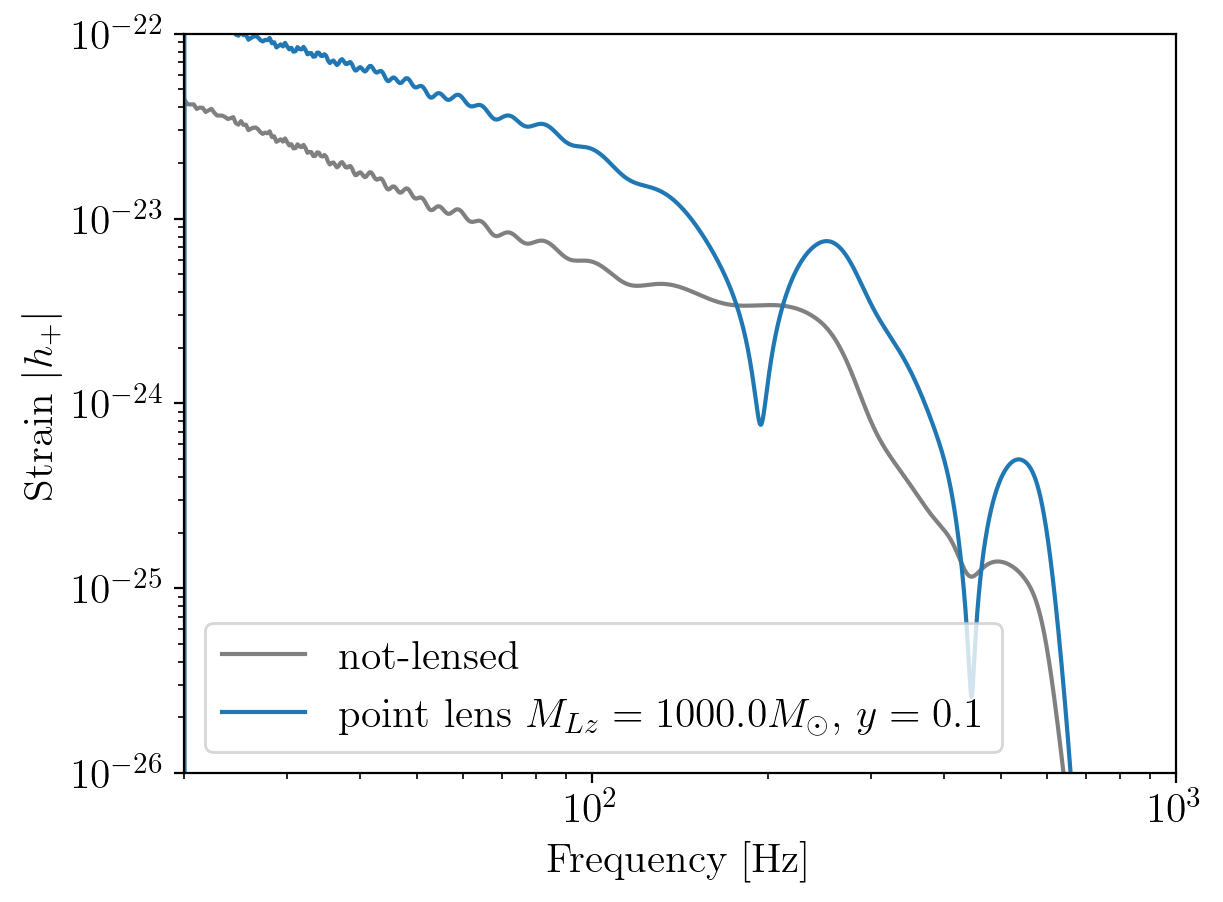

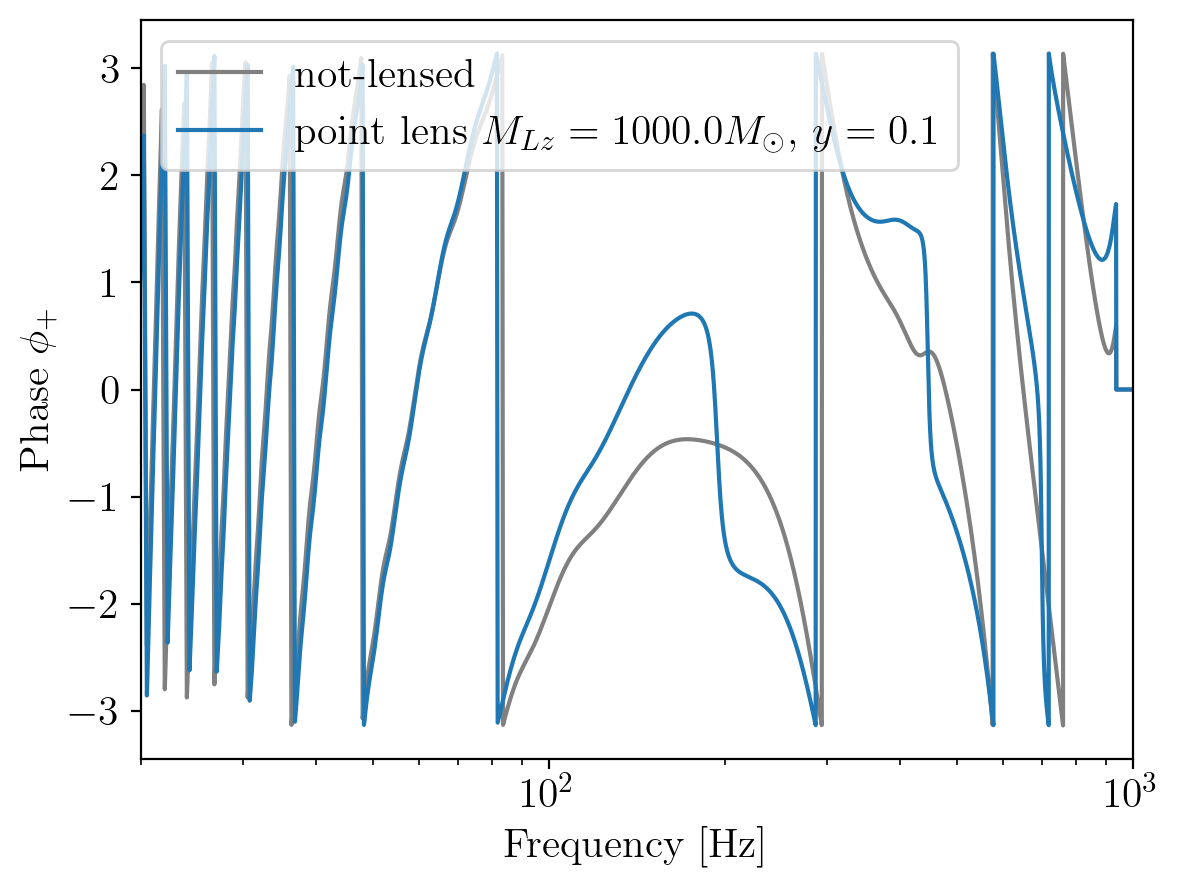

In [12]:
h_pointlens = waveform_generator_pointlens.frequency_domain_strain(binary_parameters_pointlens)

hp_pointlens = h_pointlens['plus']
hx_pointlens = h_pointlens['cross']

plt.plot(fs,abs(hp_gr),'gray',label=r'not-lensed')
plt.loglog(fs,abs(hp_pointlens),label=r'point lens $M_{Lz}=%s M_\odot$, $y=%s$'%(binary_parameters_pointlens['ML'],binary_parameters_pointlens['y']))
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Strain $|h_+|$')
plt.xlim([20,1e3])
plt.ylim([1e-26,1e-22])
plt.legend()
plt.show()

#Plot phase of the waveform
plt.semilogx(fs,np.angle(hp_gr),'gray',label=r'not-lensed')
plt.semilogx(fs,np.angle(hp_pointlens),label=r'point lens $M_{Lz}=%s M_\odot$, $y=%s$'%(binary_parameters_pointlens['ML'],binary_parameters_pointlens['y']))
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Phase $\phi_+$')
plt.xlim([20,1e3])
plt.legend()
plt.show()

### Mismatch between the lensed and unlensed waveforms

In [19]:
from scipy.interpolate import interp1d
import os
sensitivity_curves_path=os.path.join(os.getcwd(),'sensitivity_curves')

def detector_psd(file_detector):
    file_detector = os.path.join(sensitivity_curves_path,file_detector)
    data = np.genfromtxt(file_detector)
    f = data[:,0]
    h = data[:,1]
    sn_int = interp1d(f,h**2,bounds_error=False,fill_value=1.0)
    minf = min(f)
    maxf = max(f)
    return sn_int, minf, maxf

def noise_weighted_inner_product(aa, bb, power_spectral_density, duration):
    # aa: strain at detector A
    # bb: strain at detector B
    # power_spectral_density: power spectral density
    # duration: duration of the signal

    integrand = np.conj(aa) * bb / power_spectral_density
    return 4 / duration * np.sum(integrand)

def snr(strain, power_spectral_density, duration):
    # strain: strain at detector
    # power_spectral_density: power spectral density
    # duration: duration of the signal
    snr2 = noise_weighted_inner_product(strain, strain, power_spectral_density, duration)
    return np.sqrt(np.real(snr2))


In [20]:
ys = np.linspace(0.1,0.9,30)
MLz = 1000. #solar masses

tMsun = 4.925490947e-6 #solar mass in seconds
ws= 2.*np.pi * (4*tMsun*MLz) * fs

match = np.zeros(len(ys))
chi2 = np.zeros(len(ys))
Sn_Asharp, minf_Asharp, maxf_Asharp = detector_psd('a_sharp.txt')
Sn_Asharp_fs = Sn_Asharp(fs)

for i,yi in enumerate(ys):
    F_wo = waveoptics.F_pointlens(fs,MLz,yi)

    snr_wo = snr(hp_gr*F_wo,Sn_Asharp_fs,duration) #waveoptics snr
    snr_ul = snr(hp_gr,Sn_Asharp_fs,duration) #unlensed snr
    
    match[i] = np.abs(noise_weighted_inner_product(hp_gr*F_wo, hp_gr, Sn_Asharp_fs,duration)) / snr_wo/snr_ul
    chi2[i] = 2*(1-match[i])*(snr_wo**2)


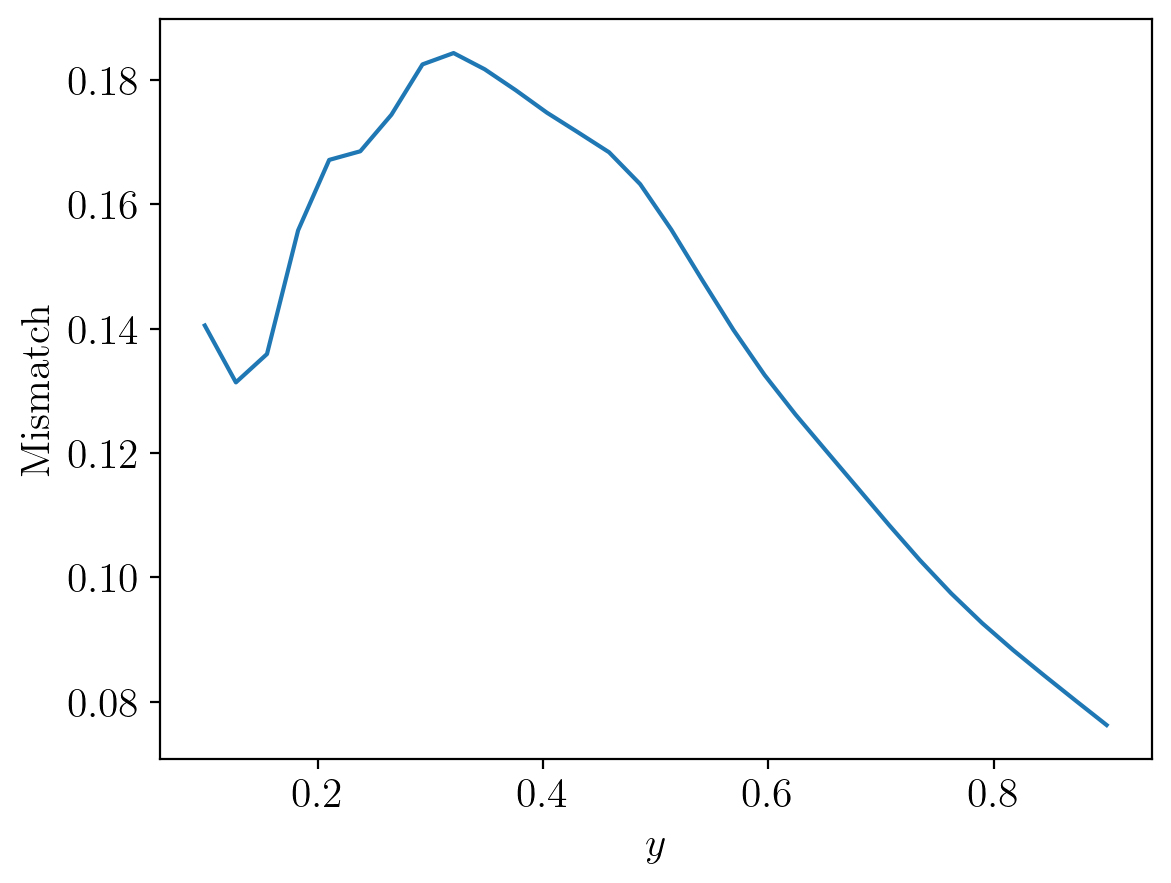

In [21]:
#Plot mismatch
plt.plot(ys,1-match)
plt.xlabel(r'$y$')
plt.ylabel(r'Mismatch')
plt.show()

In [22]:
#Mismatch varying lens mass
MLzs = np.logspace(2,4,30)
y = 0.1

match = np.zeros(len(MLzs))
chi2 = np.zeros(len(MLzs))

for i,MLzi in enumerate(MLzs):
    tMsun = 4.925490947e-6 #solar mass in seconds
    ws= 2.*np.pi * (4*tMsun*MLzi) * fs
    F_wo = waveoptics.F_pointlens(fs,MLzi,y)

    snr_wo = snr(hp_gr*F_wo,Sn_Asharp_fs,duration) #waveoptics snr
    snr_ul = snr(hp_gr,Sn_Asharp_fs,duration) #unlensed snr
    
    match[i] = np.abs(noise_weighted_inner_product(hp_gr*F_wo, hp_gr, Sn_Asharp_fs,duration)) / snr_wo/snr_ul
    chi2[i] = 2*(1-match[i])*(snr_wo**2)

/Users/jmezquiaga/opt/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/modwaveforms/waveoptics.py:57: RuntimeWarning: overflow encountered in power
  ampl = np.power(-0.5j,1.+0.5j*w)*np.power(w,1.+0.5j*w)*gamma(-0.5j*w)*lague
/Users/jmezquiaga/opt/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/modwaveforms/waveoptics.py:57: RuntimeWarning: overflow encountered in multiply
  ampl = np.power(-0.5j,1.+0.5j*w)*np.power(w,1.+0.5j*w)*gamma(-0.5j*w)*lague
/Users/jmezquiaga/opt/anaconda3/envs/igwn-py310/lib/python3.10/site-packages/modwaveforms/waveoptics.py:57: RuntimeWarning: invalid value encountered in multiply
  ampl = np.power(-0.5j,1.+0.5j*w)*np.power(w,1.+0.5j*w)*gamma(-0.5j*w)*lague


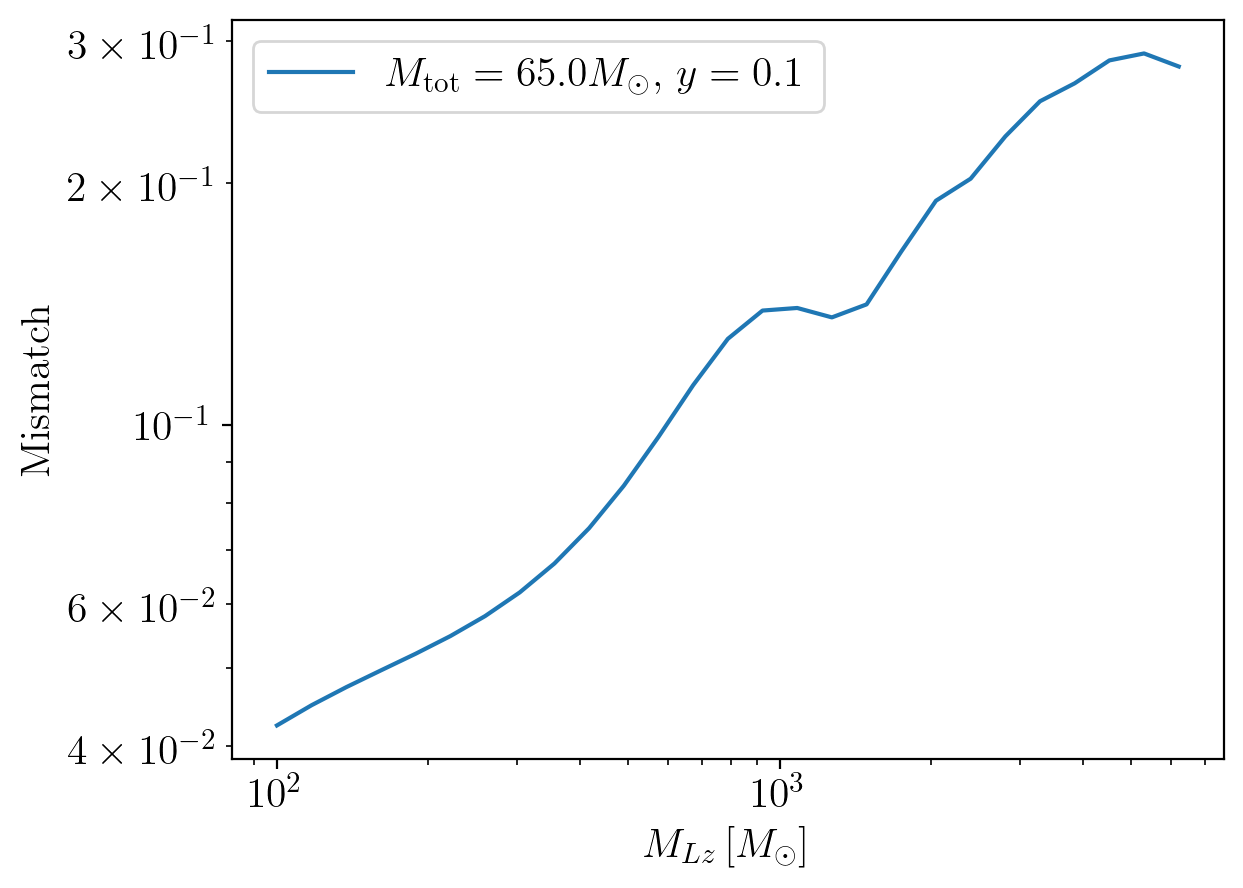

In [23]:
#Plot mismatch
plt.loglog(MLzs,1-match,label=r'$M_\mathrm{tot}=%s M_\odot$, $y=%s$' % (binary_parameters['mass_1']+binary_parameters['mass_2'],y))
plt.xlabel(r'$M_{Lz}\,[M_\odot]$')
plt.ylabel(r'Mismatch')
plt.legend()
plt.show()

# Two images

In [24]:
mu_rel_pm = pm.mu_rel(binary_parameters_pointlens['y'])
mu_plus_pm = pm.mu_plus(binary_parameters_pointlens['y'])
t_plus_pm = pm.t_delay_geom_plus(binary_parameters_pointlens['y'])* pm.t_ref(binary_parameters_pointlens['ML'])
Delta_t_pm = pm.Delta_t(binary_parameters_pointlens['ML'],binary_parameters_pointlens['y'])

binary_parameters_two_image = binary_parameters.copy()
binary_parameters_two_image['mu_rel'] = mu_rel_pm
binary_parameters_two_image['Delta_t'] = Delta_t_pm
binary_parameters_two_image['Delta_phase'] = np.pi/2

In [25]:
waveform_generator_two_image = bilby.gw.WaveformGenerator(
        duration = duration,
        sampling_frequency = sampling_frequency,
        frequency_domain_source_model = geomoptics.two_images_BBH,
        parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
        waveform_arguments = waveform_arguments,
    )

10:00 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: modwaveforms.geomoptics.two_images_BBH
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [26]:
h_two_image = waveform_generator_two_image.frequency_domain_strain(binary_parameters_two_image)
hp_two_image = np.sqrt(mu_plus_pm) * h_two_image['plus']
hx_two_image = h_two_image['cross']

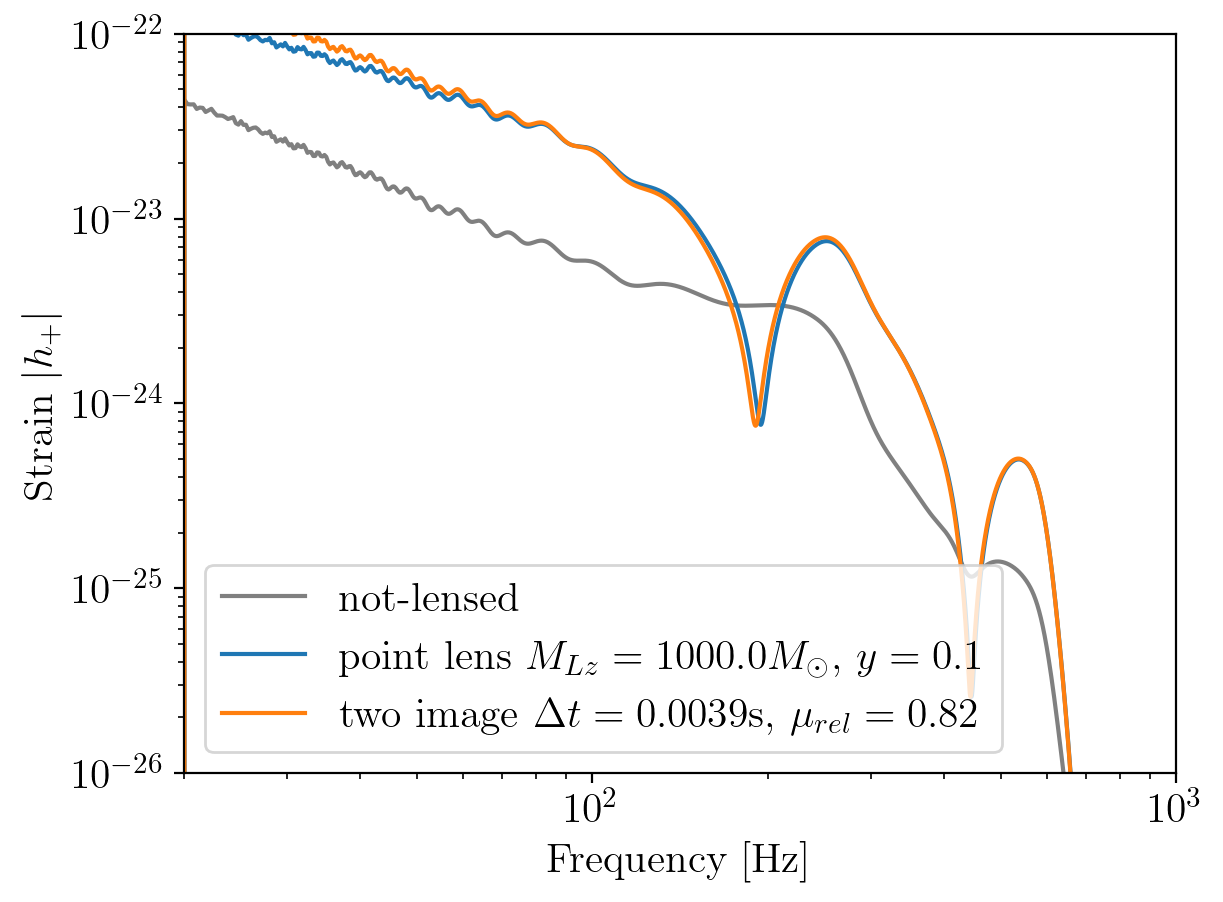

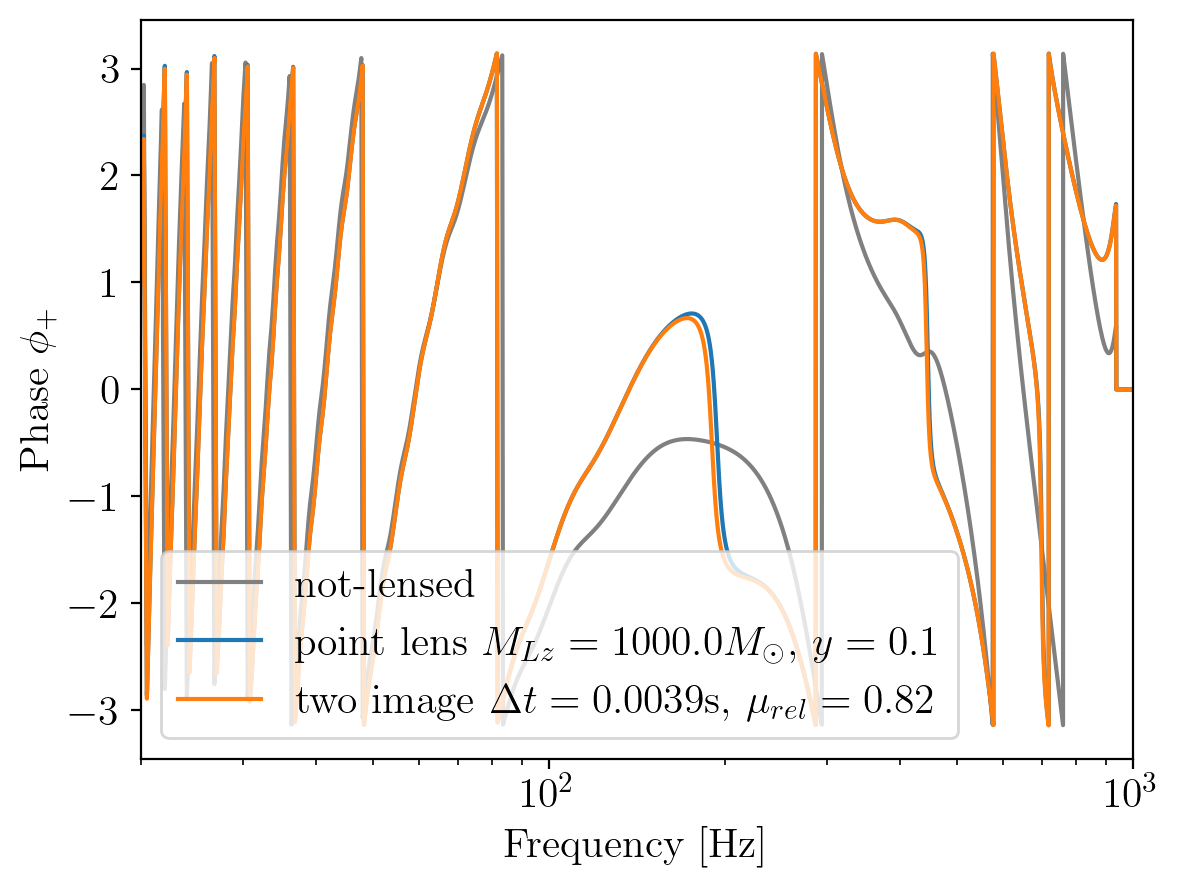

In [27]:
plt.plot(fs,abs(hp_gr),'gray',label=r'not-lensed')
plt.loglog(fs,abs(hp_pointlens),label=r'point lens $M_{Lz}=%s M_\odot$, $y=%s$'%(binary_parameters_pointlens['ML'],binary_parameters_pointlens['y']))
plt.loglog(fs,abs(hp_two_image),label=r'two image $\Delta t=%s$s, $\mu_{rel}=%s$'%(np.round(binary_parameters_two_image['Delta_t'],4),np.round(binary_parameters_two_image['mu_rel'],2)))
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Strain $|h_+|$')
plt.xlim([20,1e3])
plt.ylim([1e-26,1e-22])
plt.legend()
plt.show()

#Plot phase of the waveform
plt.semilogx(fs,np.angle(hp_gr),'gray',label=r'not-lensed')
plt.semilogx(fs,np.angle(hp_pointlens),label=r'point lens $M_{Lz}=%s M_\odot$, $y=%s$'%(binary_parameters_pointlens['ML'],binary_parameters_pointlens['y']))
plt.semilogx(fs,np.angle(hp_two_image),label=r'two image $\Delta t=%s$s, $\mu_{rel}=%s$'%(np.round(binary_parameters_two_image['Delta_t'],4),np.round(binary_parameters_two_image['mu_rel'],2)))
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Phase $\phi_+$')
plt.xlim([20,1e3])
plt.legend()
plt.show()